<a href="https://colab.research.google.com/github/hogyunkim/pocket/blob/main/2_Logistic_Regression%EC%9C%BC%EB%A1%9C_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89_%EC%83%9D%EC%A1%B4%EC%9E%90_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/DSNote/taling_data/main/titanic_clean.csv')

In [3]:
data

,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,0
...,...,...,...,...,...,...,...,...,...
877,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,S,0
878,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,S,1
879,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,S,0
880,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,C,1


In [4]:
data.head(5)

,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    882 non-null    int64  
 1   Name      882 non-null    object 
 2   Gender    882 non-null    object 
 3   Age       882 non-null    float64
 4   SibSp     882 non-null    int64  
 5   Parch     882 non-null    int64  
 6   Ticket    882 non-null    object 
 7   Embarked  882 non-null    object 
 8   Survived  882 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 62.1+ KB


In [6]:
data.describe()

,Pclass,Age,SibSp,Parch,Survived
count,882.000000,882.000000,882.000000,882.000000,882.000000
mean,2.311791,29.541950,0.520408,0.375283,0.377551
std,0.835681,12.783114,1.105210,0.804909,0.485049
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,0.000000
75%,3.000000,35.000000,1.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,1.000000


In [7]:
data.corr()

,Pclass,Age,SibSp,Parch,Survived
Pclass,1.000000,-0.344640,0.080974,0.019907,-0.338345
Age,-0.344640,1.000000,-0.230080,-0.155920,-0.048872
SibSp,0.080974,-0.230080,1.000000,0.415633,-0.038739
Parch,0.019907,-0.155920,0.415633,1.000000,0.072772
Survived,-0.338345,-0.048872,-0.038739,0.072772,1.000000


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

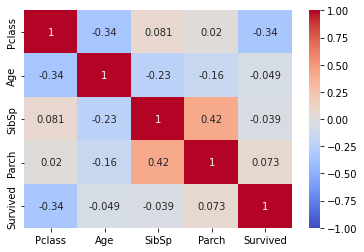

In [9]:
sns.heatmap(data.corr(), cmap = 'coolwarm', vmin = -1, vmax = 1, annot = True)
#sns.heatmap() ->  숫자가 높을수록 밝은색으로 표시해주는 그래프
#coolwarm #annot = True

In [10]:
data['Gender'].nunique()

2

In [11]:
data['Name'].nunique()

882

In [12]:
data['Embarked'].nunique()

3

In [13]:
data['Ticket'].nunique()

679

In [14]:
data = pd.get_dummies(data, columns = ['Gender', 'Embarked'], drop_first = True) 

In [15]:
data

,Pclass,Name,Age,SibSp,Parch,Ticket,Survived,Gender_male,Embarked_Q,Embarked_S
0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,0,1,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,1,0,0,0
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,1,0,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,1,0,0,1
4,3,"Allen, Mr. William Henry",35.0,0,0,373450,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
877,2,"Montvila, Rev. Juozas",27.0,0,0,211536,0,1,0,1
878,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,1,0,0,1
879,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,0,0,0,1
880,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,1,1,0,0


In [16]:
data.drop(['Name', 'Ticket'], axis =1, inplace = True)

In [17]:
data.head()

,Pclass,Age,SibSp,Parch,Survived,Gender_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,0,1,0,1
1,1,38.0,1,0,1,0,0,0
2,3,26.0,0,0,1,0,0,1
3,1,35.0,1,0,1,0,0,1
4,3,35.0,0,0,0,1,0,1


In [18]:
X = data.drop('Survived', axis =1)
y = data['Survived']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lr = LogisticRegression()

In [23]:
lr.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
pred = lr.predict(X_test)

In [25]:
pd.DataFrame({'actual' : y_test, 'pred' : pred})

,actual,pred
805,0,0
564,0,0
188,1,1
171,0,0
854,0,0
...,...,...
739,1,0
259,1,0
404,1,0
216,1,1


In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy_score(y_test, pred)

0.7570621468926554

In [28]:
lr.coef_

array([[-1.20121442, -0.03822974, -0.36581627, -0.02741947, -2.72922002,
        -0.21878937, -0.41801414]])

In [29]:
lr.coef_[0]

array([-1.20121442, -0.03822974, -0.36581627, -0.02741947, -2.72922002,
       -0.21878937, -0.41801414])

In [30]:
pd.Series(lr.coef_[0], index = X_train.columns)

Pclass        -1.201214
Age           -0.038230
SibSp         -0.365816
Parch         -0.027419
Gender_male   -2.729220
Embarked_Q    -0.218789
Embarked_S    -0.418014
dtype: float64